# 1장 Matrix Computation

# 1절 벡터, 행렬

#### 코드 출처 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html https://colab.research.google.com/github/SLCFLAB/Math4DS/blob/main

## 1.1 벡터 만들기

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np

In [2]:
np.__version__

'1.18.5'

In [3]:
# 하나의 행으로 벡터를 만듭니다.
vector_row = np.array([1, 2, 3])

In [4]:
vector_row

array([1, 2, 3])

In [5]:
# 하나의 열로 벡터를 만듭니다.
vector_column = np.array([[1],
                          [2],
                          [3]])

In [6]:
vector_column

array([[1],
       [2],
       [3]])

### 불임

In [7]:
# 넘파이 배열의 클래스를 출력합니다.
print(type(vector_row))

<class 'numpy.ndarray'>


In [8]:
# ndarray를 사용하는 것은 권장되지 않습니다.
bad_way = np.ndarray((3,))

In [9]:
new_row = np.asarray([1, 2, 3])
# asarray()는 새로운 배열을 만들지 않습니다.
new_row = np.asarray(vector_row)
new_row is vector_row

True

In [10]:
# array()는 배열이 입력되면 새로운 배열을 만듭니다.
new_row = np.array(vector_row)
new_row is vector_row

False

In [11]:
# copy() 메서드를 사용하면 의도가 분명해집니다.
new_row = vector_row.copy()
new_row is vector_row

False

## 1.2 행렬 만들기

In [40]:
# numpy.matrix is matrix class that has a more convenient interface than numpy.ndarray for matrix operations. 
# This class supports, MATLAB-like creation syntax via the semicolon, has matrix multiplication as default for the * operator, 
# and contains I and T members that serve as shortcuts for inverse and transpose:
import numpy as np
A = np.mat('[1 2;3 4]')
A

matrix([[1, 2],
        [3, 4]])

In [22]:
A.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [41]:
b = np.mat('[5 6]')
b

matrix([[5, 6]])

In [42]:
b.T

matrix([[5],
        [6]])

In [43]:
A*b.T
# the matrix data structure is not recommended for two reasons. 
# First, arrays are the de facto standard data structure of NumPy. 
# Second, the vast majority of NumPy operations return arrays, not matrix objects.

matrix([[17],
        [39]])

### the above code can be rewritten as:

In [27]:
# scipy.linalg operations can be applied equally to numpy.matrix or to 2D numpy.ndarray objects.
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [28]:
linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [29]:
b = np.array([[5,6]]) #2D array
b

array([[5, 6]])

In [30]:
b.T

array([[5],
       [6]])

In [31]:
A*b #not matrix multiplication!

array([[ 5, 12],
       [15, 24]])

In [32]:
A.dot(b.T) #matrix multiplication

array([[17],
       [39]])

In [34]:
b = np.array([5,6]) #1D array
b

array([5, 6])

In [35]:
b.T  #not matrix transpose!

array([5, 6])

In [36]:
A.dot(b)  #does not matter for multiplication

array([17, 39])

### 붙임

In [14]:
# 임의의 값이 채워진 배열을 만듭니다.
empty_matrix = np.empty((3, 2))
empty_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [15]:
zero_matrix = np.zeros((3, 2))
zero_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [16]:
one_matrix = np.ones((3, 2))
one_matrix

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [17]:
# 0 행렬을 만든 후 7을 더합니다.
seven_matrix = np.zeros((3, 2)) + 7
# full() 함수를 사용하는 것이 효율적입니다.
seven_matrix = np.full((3, 2), 7)
seven_matrix

array([[7, 7],
       [7, 7],
       [7, 7]])

## 1.3 희소 행렬 만들기

In [18]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy import sparse

# 행렬을 만듭니다. 
matrix = np.array([[0, 0],
                   [0, 1],
                   [3, 0]])

# CSR (compressed sparse row) 행렬을 만듭니다.
matrix_sparse = sparse.csr_matrix(matrix)

In [19]:
# 희소 행렬을 출력합니다.
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [20]:
# 큰 행렬을 만듭니다.
matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# CSR 행렬을 만듭니다.
matrix_large_sparse = sparse.csr_matrix(matrix_large)

# 원래 희소 행렬을 출력합니다.
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [21]:
# 큰 희소 행렬을 출력합니다.
print(matrix_large_sparse)

  (1, 1)	1
  (2, 0)	3


### 붙임

In [22]:
# (data, (row_index, col_index))로 구성된 튜플을 전달합니다.
# shape 매개변수에서 0을 포함한 행렬의 전체 크기를 지정합니다.  
matrix_sparse_2 = sparse.csr_matrix(([1, 3], ([1, 2], [1, 0])), shape=(3, 10))

print(matrix_sparse_2)

  (1, 1)	1
  (2, 0)	3


In [23]:
print(matrix_sparse_2.toarray())

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]]


In [24]:
matrix_sparse_2.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## 1.4 원소 선택

In [25]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행 벡터를 만듭니다.
vector = np.array([1, 2, 3, 4, 5, 6])

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# vector의 세 번째 원소를 선택합니다.
vector[2]

3

In [26]:
# matrix의 두 번째 행, 두 번째 열의 원소를 선택합니다.
matrix[1,1]

5

In [27]:
# 벡터에 있는 모든 원소를 선택합니다.
vector[:]

array([1, 2, 3, 4, 5, 6])

In [28]:
# 세 번째 원소를 포함하여 그 이전의 모든 원소를 선택합니다.
vector[:3]

array([1, 2, 3])

In [29]:
# 세 번째 이후의 모든 원소를 선택합니다.
vector[3:]

array([4, 5, 6])

In [30]:
# 마지막 원소를 선택합니다.
vector[-1]

6

In [31]:
# 행렬에서 첫 번째 두 개의 행과 모든 열을 선택합니다.
matrix[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
# 모든 행과 두 번째 열을 선택합니다.
matrix[:,1:2]

array([[2],
       [5],
       [8]])

### 붙임

In [33]:
# 첫 번째 행과 세 번째 행을 선택합니다.
matrix[[0,2]]

array([[1, 2, 3],
       [7, 8, 9]])

In [34]:
# (0, 1), (2, 0) 위치의 원소를 선택합니다.
matrix[[0,2], [1,0]]

array([2, 7])

In [35]:
# matrix의 각 원소에 비교 연산자가 적용됩니다.
mask = matrix > 5

mask

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [36]:
# 불리언 마스크 배열을 사용하여 원소를 선택합니다.
matrix[mask]

array([6, 7, 8, 9])

## 1.5 행렬 정보 확인

In [37]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

# 행렬의 크기를 확인합니다.
matrix.shape

(3, 4)

In [38]:
# 행렬의 원소 개수를 확인합니다(행 * 열).
matrix.size

12

In [39]:
# 차원 수를 확인합니다.
matrix.ndim

2

### 붙임

In [40]:
# 원소의 데이터 타입을 확인합니다.
print(matrix.dtype)

int64


In [41]:
# 원소 하나가 차지하는 바이트 크기입니다. 
print(matrix.itemsize)

8


In [42]:
# 배열 전체가 차지하는 바이트 크기입니다.
print(matrix.nbytes)

96


## 1.6 벡터화 연산 적용하기

In [43]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 100을 더하는 함수를 만듭니다.
add_100 = lambda i: i + 100

# 벡터화된 함수를 만듭니다.
vectorized_add_100 = np.vectorize(add_100)

# 행렬의 모든 원소에 함수를 적용합니다.
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [44]:
# 모든 원소에 100을 더합니다.
matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

### 붙임

In [45]:
# (3, 3) 크기 행렬에 (3, ) 벡터를 더하면 
# (1, 3) 크기가 된다음 행을 따라 반복됩니다.
matrix + [100, 100, 100]

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [46]:
# (3, 3) 크기 행렬에 (3, 1) 벡터를 더하면 열을 따라 반복됩니다.
matrix + [[100], [100], [100]]

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

## 1.7 최댓값, 최솟값 찾기

In [47]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 가장 큰 원소를 반환합니다.
np.max(matrix)

9

In [48]:
# 가장 작은 원소를 반환합니다.
np.min(matrix)

1

In [49]:
# 각 열에서 최댓값을 찾습니다.
np.max(matrix, axis=0)

array([7, 8, 9])

In [50]:
# 각 행에서 최댓값을 찾습니다.
np.max(matrix, axis=1)

array([3, 6, 9])

### 붙임

In [51]:
# 이전 예와 달리 (3, 1) 크기의 열 벡터가 만들어 집니다.
vector_column = np.max(matrix, axis=1, keepdims=True)

vector_column

array([[3],
       [6],
       [9]])

In [52]:
# 열 벡터이므로 브로드캐스팅을 이용하여 각 행의 최댓값을 뺄 수 있습니다.
matrix - vector_column

array([[-2, -1,  0],
       [-2, -1,  0],
       [-2, -1,  0]])

## 1.8 평균, 분산, 표준 편차 계산하기

In [53]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 평균을 반환합니다.
np.mean(matrix)

5.0

In [54]:
# 분산을 반환합니다.
np.var(matrix)

6.666666666666667

In [55]:
# 표준 편차를 반환합니다.
np.std(matrix)

2.581988897471611

In [56]:
# 각 열의 평균을 계산합니다.
np.mean(matrix, axis=0)

array([4., 5., 6.])

### 붙임

In [57]:
np.std(matrix, ddof=1)

2.7386127875258306

In [58]:
import pandas as pd

df = pd.DataFrame(matrix.flatten())
df.std()

0    2.738613
dtype: float64

## 1.9 배열 크기 바꾸기

In [59]:
# 라이브러리를 임포트합니다.
import numpy as np

# 4x3 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

# 2x6 행렬로 크기를 바꿉니다.
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [60]:
matrix.size

12

In [61]:
matrix.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [62]:
matrix.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### 붙임

In [63]:
matrix.reshape(-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [64]:
matrix.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## 1.10 벡터나 행렬을 전치하기

In [65]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬을 전치합니다.
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [66]:
# 벡터를 전치합니다. -1D array
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

In [67]:
# 행 벡터를 전치합니다.- 2D array
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### 붙임

In [68]:
matrix.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [54]:
# 2x3x2 행렬을 만듭니다.
matrix = np.array([[[ 1,  2],
                    [ 3,  4],
                    [ 5,  6]],

                   [[ 7,  8],
                    [ 9, 10],
                    [11, 12]]])

# 두 번째와 세 번째 차원을 바꾸어 2x2x3 행렬로 만듭니다.
matrix.transpose((0, 2, 1))

array([[[ 1,  3,  5],
        [ 2,  4,  6]],

       [[ 7,  9, 11],
        [ 8, 10, 12]]])

## 1.11 행렬 펼치기

In [70]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# 행렬을 펼칩니다.
matrix.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
matrix.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

### 붙임

In [72]:
vector_reshaped = matrix.reshape(-1)
vector_flattened = matrix.flatten()

# (0, 0) 위치의 원소를 바꿉니다.
matrix[0][0] = -1

# 배열의 뷰는 원본 배열의 변경 사항을 반영합니다.
vector_reshaped

array([-1,  2,  3,  4,  5,  6,  7,  8,  9])

In [73]:
# 복사된 배열에는 영향이 미치지 않습니다.
vector_flattened

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 2절 Numerical Linear Algebra

## 2.1 행렬의 랭크 구하기

In [74]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 1, 1],
                   [1, 1, 10],
                   [1, 1, 15]])

# 행렬의 랭크를 반환합니다.
np.linalg.matrix_rank(matrix)

2

### 붙임

넘파이 0.18 버전에서 `rank()` 함수가 삭제되었습니다. 대신 `ndim()` 함수를 사용하세요.

In [77]:
# 2D 배열이므로 2가 반환됩니다.
np.ndim(matrix)

2

In [78]:
# svd 함수로 특잇값만 계산합니다.
s = np.linalg.svd(matrix, compute_uv=False)
# 오차를 고려하여 0에 가까운 아주 작은 값을 지정합니다.
np.sum(s > 1e-10)

2

## 2.2 행렬식(determinant)과 norm 계산하기

In [65]:
# 라이브러리를 임포트합니다.
import numpy as np
from scipy import linalg

# 행렬을 만듭니다.
A = np.array([[1, 3, 5],
              [2, 5, 1],
              [2, 3, 8]])

# 행렬의 행렬식을 반환합니다.
linalg.det(A)

-25.000000000000004

In [66]:
linalg.norm(A)

11.916375287812984

In [67]:
linalg.norm(A,'fro') # frobenius norm is the default

11.916375287812984

In [68]:
linalg.norm(A,1) # L1 norm (max column sum)

14.0

In [69]:
linalg.norm(A,-1) # min column sum

5.0

In [70]:
linalg.norm(A,np.inf) # L inf norm (max row sum)

13.0

## 2.3 행렬의 대각 원소 추출하기

In [80]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각 원소를 반환합니다.
matrix.diagonal()

array([1, 4, 9])

### 붙임

In [81]:
# 반환된 배열을 변경하려면 복사해야 합니다.
a = matrix.diagonal().copy()

In [82]:
a = np.diag(matrix)
print(a)

[1 4 9]


In [83]:
# 1차원 배열이 주어지면 2차원 대각행렬을 만듭니다.
np.diag(a)

array([[1, 0, 0],
       [0, 4, 0],
       [0, 0, 9]])

## 2.4 행렬의 대각합(trace) 계산

In [52]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

# 대각합을 반환합니다.
matrix.trace()

14

In [85]:
# 대각 원소를 사용하여 합을 구합니다.
sum(matrix.diagonal())

14

### 붙임

In [86]:
# 주 대각선 하나 위의 대각 원소의 합을 반환합니다.
matrix.trace(offset=1)

8

In [87]:
# 주 대각선 하나 아래의 대각 원소의 합을 반환합니다.
matrix.trace(offset=-1)

10

## 2.5 점곱 계산

In [91]:
# 라이브러리를 임포트합니다.
import numpy as np

# 두 벡터를 만듭니다.
vector_a = np.array([1,2,3])
vector_b = np.array([4,5,6])

# 점곱을 계산합니다.
np.dot(vector_a, vector_b)

32

### 붙임

In [92]:
scalar_a = np.array(1)
scalar_b = np.array(2)

In [93]:
np.dot(scalar_a, scalar_b)

2

In [94]:
# 스칼라 배열에 적용되지 않습니다.
scalar_a @ scalar_b

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

## 2.6 행렬 덧셈과 뺄셈

In [95]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3, 1],
                     [1, 3, 1],
                     [1, 3, 8]])

# 두 행렬을 더합니다.
np.add(matrix_a, matrix_b)

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

In [96]:
# 두 행렬을 뺍니다.
np.subtract(matrix_a, matrix_b)

array([[ 0, -2,  0],
       [ 0, -2,  0],
       [ 0, -2, -6]])

In [97]:
# 두 행렬을 더합니다.
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

## 2.7 행렬 곱셈

In [98]:
# 라이브러리를 임포트합니다.
import numpy as np

# 행렬을 만듭니다.
matrix_a = np.array([[1, 1],
                     [1, 2]])

# 행렬을 만듭니다.
matrix_b = np.array([[1, 3],
                     [1, 2]])

# 두 행렬을 곱합니다.
np.dot(matrix_a, matrix_b)

array([[2, 5],
       [3, 7]])

In [99]:
# 두 행렬을 곱합니다.
matrix_a @ matrix_b

array([[2, 5],
       [3, 7]])

In [100]:
# 두 행렬의 원소별 곱셈을 수행합니다.
matrix_a * matrix_b

array([[1, 3],
       [1, 4]])

### 붙임

In [101]:
a = np.random.rand(2, 1, 4, 5)
b = np.random.rand(1, 3, 5, 6)

np.dot(a, b).shape

(2, 1, 4, 1, 3, 6)

In [102]:
np.matmul(a, b).shape

(2, 3, 4, 6)

## 2.8 역행렬 구하기, 연립방정식 풀기

In [74]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [56]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [57]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16, -5.55111512e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

In [64]:
# 행렬과 역행렬을 곱합니다.
A @ np.linalg.inv(A)

array([[ 1.00000000e+00,  1.11022302e-16,  4.85722573e-17],
       [-1.38777878e-16,  1.00000000e+00,  7.63278329e-17],
       [-2.22044605e-16,  0.00000000e+00,  1.00000000e+00]])

In [75]:
b = np.array([[10], [8], [3]])
b

array([[10],
       [ 8],
       [ 3]])

In [59]:
linalg.inv(A).dot(b)  # slow

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [60]:
A.dot(linalg.inv(A).dot(b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

In [61]:
np.linalg.solve(A, b)  # fast

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [62]:
A.dot(np.linalg.solve(A, b)) - b  # check

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])

###  LU factorization 

In [78]:
import numpy as np
from scipy.linalg import lu
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
P, L, U = lu(A)
np.allclose(A - P @ L @ U, np.zeros((3, 3)))

True

In [81]:
b = np.array([[10], [8], [3]])
y=np.linalg.solve(L, P.T@ b)
y

array([[ 8.  ],
       [-5.  ],
       [ 4.75]])

In [82]:
x=np.linalg.solve(U, y)
x

array([[-9.28],
       [ 5.16],
       [ 0.76]])

## 2.9 최소좌승법 & QR

In [118]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [119]:
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

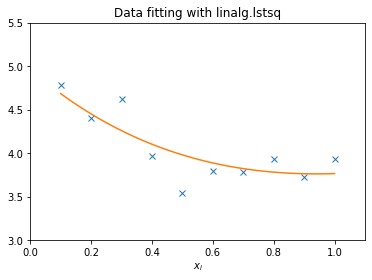

In [120]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [121]:
q, r = linalg.qr(A)
np.allclose(A, np.dot(q, r))

True

In [130]:
A.shape, q.shape, r.shape

((10, 2), (10, 10), (10, 2))

In [123]:
# either both Q and R (‘full’, default), only R (‘r’) or 
# both Q and R but computed in economy-size (‘economic’, see Notes)
r2 = linalg.qr(A, mode='r')
np.allclose(r, r2)

True

In [125]:
q3, r3 = linalg.qr(A, mode='economic')
q3.shape, r3.shape

((10, 2), (2, 2))

In [131]:
q3.T@ zi

array([-12.56956849,   2.61279847])

In [133]:
x=np.linalg.solve(r3, q3.T@ zi)
x, c

(array([4.96165066, 1.93854873]), array([4.96165066, 1.93854873]))

## 2.10 Eigenvalues and eigenvectors & SVD

In [89]:
import numpy as np
from scipy import linalg
A = np.array([[1, 5, 2], [2, 4, 1], [3, 6, 2]])
la, v = linalg.eig(A)
l1, l2, l3 = la
print(l1,l2,l3)

(7.957916204910748+0j) (-1.2576647056775332+0j) (0.2997485007667829+0j)


In [90]:
print(v[:, 0]) 
print(v[:, 1]) 
print(v[:, 2]) 

[-0.5297175  -0.44941741 -0.71932146]
[-0.90730751  0.28662547  0.30763439]
[ 0.28380519 -0.39012063  0.87593408]


In [91]:
print(np.sum(abs(v**2), axis=0))  # eigenvectors are unitary

[1. 1. 1.]


In [92]:
v1 = np.array(v[:, 0]).T
print(linalg.norm(A.dot(v1) - l1*v1))  # check the computation

3.233018248352212e-15


In [93]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [101]:
M,N = A.shape
U,s,Vh = linalg.svd(A)
Sig = linalg.diagsvd(s,M,N)
U.shape,  s.shape, Vh.shape

((2, 2), (2,), (3, 3))

In [98]:
U

array([[-0.3863177 ,  0.92236578],
       [-0.92236578, -0.3863177 ]])

In [102]:
Sig

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [99]:
Vh

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [-0.80596391, -0.11238241,  0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [100]:
U.dot(Sig.dot(Vh)) #check computation

array([[1., 2., 3.],
       [4., 5., 6.]])

### Moore-Penrose pseudo-inverse

In [114]:
M = np.array([[1, 4, 7],
                   [2, 5, 8]])

# 유사 역행렬을 계산합니다.
pM=np.linalg.pinv(M)
pM

array([[-1.16666667,  1.        ],
       [-0.33333333,  0.33333333],
       [ 0.5       , -0.33333333]])

In [115]:
np.allclose(M, np.dot(M, np.dot(pM, M)))

True

In [116]:
np.allclose(pM, np.dot(pM, np.dot(M, pM)))

True

## 2.11 난수 생성

In [106]:
# 라이브러리를 임포트합니다.
import numpy as np

# 초깃값을 지정합니다.
np.random.seed(0)

# 0.0과 1.0 사이에서 세 개의 실수 난수를 생성합니다.
np.random.random(3)

array([0.5488135 , 0.71518937, 0.60276338])

In [107]:
# 1과 10 사이에서 세 개의 정수 난수를 생성합니다.
np.random.randint(0, 11, 3)

array([3, 7, 9])

In [108]:
# 평균이 0.0이고 표준 편차가 1.0인 정규 분포에서 세 개의 수를 뽑습니다.
np.random.normal(0.0, 1.0, 3)

array([-1.42232584,  1.52006949, -0.29139398])

In [109]:
# 평균이 0.0이고 스케일이 1.0인 로지스틱 분포에서 세 개의 수를 뽑습니다.
np.random.logistic(0.0, 1.0, 3)

array([-0.98118713, -0.08939902,  1.46416405])

In [110]:
# 1.0보다 크거나 같고 2.0보다 작은 세 개의 수를 뽑습니다.
np.random.uniform(1.0, 2.0, 3)

array([1.47997717, 1.3927848 , 1.83607876])

### 붙임

In [111]:
# 0.0(포함)과 1.0 사이에서 세 개의 실수 난수를 생성합니다.
# np.random.random((2, 3)), np.random.sample((2, 3)), 
# np.random.uniform(0.0, 1.0, (2, 3))과 동일합니다.
np.random.random_sample((2, 3))

array([[0.33739616, 0.64817187, 0.36824154],
       [0.95715516, 0.14035078, 0.87008726]])

In [112]:
# np.random.random_sample((2, 3))과 동일합니다.
np.random.rand(2, 3)

array([[0.47360805, 0.80091075, 0.52047748],
       [0.67887953, 0.72063265, 0.58201979]])

In [113]:
np.random.randint(0, 1, 10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
# np.random.normal(0.0, 1.0, (2, 3))과 동일합니다.
np.random.standard_normal((2, 3))

array([[-0.13309028,  1.59456053,  0.23043417],
       [-0.06491034, -0.96898025,  0.59124281]])

In [115]:
# np.random.normal(0.0, 1.0, (2, 3))과 동일합니다.
np.random.randn(2, 3)

array([[-0.7827755 , -0.44423283, -0.34518616],
       [-0.88180055, -0.44265324, -0.5409163 ]])

In [116]:
# 0~2 사이의 정수 중 랜덤하게 10번을 뽑습니다.
# np.random.choice(3, 5)와 동일합니다.
np.random.choice([0,1,2], 5)

array([0, 1, 2, 2, 0])

In [117]:
a = np.array([0, 1, 2, 3, 4])
np.random.shuffle(a)
a

array([0, 2, 3, 4, 1])

In [118]:
# a는 변경되지 않습니다.
np.random.permutation(a)

array([2, 0, 1, 3, 4])

In [119]:
np.random.permutation(5)

array([4, 1, 2, 0, 3])